In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go

from scipy.optimize import least_squares # least squares non linear
from scipy.optimize import NonlinearConstraint

from scipy.integrate import quad
from scipy import real

In [2]:
from ipywidgets import interact, FloatSlider

In [3]:
from scipy.optimize import minimize

### On charge la base de donnée

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df['Strike'].iloc[29] = 45

C:\Users\Jason\AppData\Local\Temp\ipykernel_9316\754857953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Strike'].iloc[29] = 45


In [6]:
def call(S, K, r, T, pi1, pi2):
    return S*pi1 - K*np.exp(-r*T)*pi2

In [7]:
call(39.63,36,0.05,0.049315,5,5)

18.593288256394402

In [8]:
df.head(1)

,Spot,Maturity,Strike,Interest_rate,Mid,Bid,Ask
0,39.63,0.049315,36,0.000632,3.75,3.7,3.8


### PREMIERE PARTIE : On minimise $\Pi_1$ et $\Pi_2$

In [9]:
p_1 = []
p_2 = []
initial_guess = [1.0, 1.0]
for i in range(df.shape[0]):
    def cost_pi(params):
        pi1, pi2 = params
        return (call(df['Spot'].iloc[i], df['Strike'].iloc[i], df['Interest_rate'].iloc[i], df['Maturity'].iloc[i], pi1, pi2) - df['Mid'].iloc[i])**2
    result = least_squares(mse, initial_guess)
    p_1.append(result.x[0])
    p_2.append(result.x[1])

NameError: name 'mse' is not defined

In [35]:
p_1

[0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426,
 0.8689113511024426]

In [38]:
sum(p_1)/len(p_1)

0.868911351102443

In [39]:
p_2

[0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223,
 0.7540375381868223]

In [40]:
sum(p_2)/len(p_2)

0.754037538186822

### Première partie : On implémente la méthode least square non linear

In [10]:
def mse(params):
    pi1, pi2 = params
    s=0
    for i in range(df.shape[0]):
        # call(S, K, r, T, pi1, pi2)
        s += (call(39.63,df['Strike'].iloc[i],df['Interest_rate'].iloc[i],df['Maturity'].iloc[i],pi1,pi2) - df['Mid'].iloc[i])**2
    return s/df.shape[0]

In [11]:
initial_guess = [1.0, 1.0]

# Utilisation de least_squares pour minimiser mse
result = least_squares(mse, initial_guess)

# Les paramètres ajustés sont dans result.x
pi1_optimal, pi2_optimal = result.x

In [12]:
print(pi1_optimal)
print(pi2_optimal)

0.8689113511024426
0.7540375381868223


In [13]:
mse([0.8689113511024,0.7540375381868223])

5.553772390704269

In [37]:
pi1_values = np.linspace(0, 1, 100)
pi2_values = np.linspace(0, 1, 100)

# Créer une grille de valeurs pour pi1 et pi2
pi1_grid, pi2_grid = np.meshgrid(pi1_values, pi2_values)

# Calculer la MSE pour chaque paire de pi1 et pi2
mse_values = np.zeros_like(pi1_grid)
for i in range(len(pi1_values)):
    for j in range(len(pi2_values)):
        mse_values[i, j] = mse([pi1_values[i], pi2_values[j]])

# Définir une fonction pour afficher la surface de MSE
def plot_surface(pi1, pi2):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(pi1_grid, pi2_grid, mse_values, cmap='viridis')
    ax.set_xlabel('pi1')
    ax.set_ylabel('pi2')
    ax.set_zlabel('Cost')
    ax.set_title('Cost function')
    ax.scatter(pi1, pi2, mse([pi1, pi2]), color='red', s=100, label='Current Point')
    ax.legend()
    plt.show()

# Utiliser ipywidgets pour créer des curseurs interactifs
pi1_slider = FloatSlider(value=0.5, min=0, max=1, step=0.01, description='pi1')
pi2_slider = FloatSlider(value=0.5, min=0, max=1, step=0.01, description='pi2')

# Créer une fonction interactive
interact(plot_surface, pi1=pi1_slider, pi2=pi2_slider)

interactive(children=(FloatSlider(value=0.5, description='pi1', max=1.0, step=0.01), FloatSlider(value=0.5, de…

<function __main__.plot_surface(pi1, pi2)>

In [15]:
def fonction_char(w,T, params):
    v0, vbar, a, eta, rho = params

    gamma = (eta**2)/2
    beta = a - rho*eta*1j*w
    alpha = - w**2/2 - (w*1j)/2
    h = np.sqrt(beta**2 - 4*alpha*gamma)
    rplus = (beta + h)/(eta**2)
    rmoins = (beta - h)/(eta**2)
    g = rmoins/rplus
    D = rmoins * (1 - np.exp(-h*T))/(1-g*np.exp(-h*T))
    C = a*(rmoins*T - (2/eta**2)*np.log((1-g*np.exp(-h*T))/(1 - np.exp(-h*T))))
    return np.exp(C*vbar + D*v0 + 1j*w*np.log(39.63*np.exp(0.05*T)))



In [15]:
fonction_char(5,0.04, [0.09,0.3,0.7,0.7,-0.3])

(0.11230109265115475-0.016004940604935458j)

In [16]:
def get_pi1_pi2(params):
    v0, vbar, a, eta, rho = params

    integrand = lambda omega: real((np.exp(-1j * omega * np.log(36)) * fonction_char(omega - 1j, 0.04, params)) / (1j * omega * fonction_char(omega, 0.04, params)))
    p1, _ = quad(integrand, 0, 500)
    return p1 - 0.9308594861779931
    

In [17]:
get_pi1_pi2([0.5,0.5,0.5,0.5,0])

C:\Users\Jason\AppData\Local\Temp\ipykernel_16516\1571045818.py:4: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  integrand = lambda omega: real((np.exp(-1j * omega * np.log(36)) * fonction_char(omega - 1j, 0.04, params)) / (1j * omega * fonction_char(omega, 0.04, params)))
C:\Users\Jason\AppData\Local\Temp\ipykernel_16516\1571045818.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  p1, _ = quad(integrand, 0, 500)


-63.82716089356176

In [18]:
initial_guess = [0.5,0.5,0.5,0.5,0]

# Minimisation de la fonction objectif
result = minimize(get_pi1_pi2, initial_guess, method='L-BFGS-B')

# Les paramètres ajustés se trouvent dans result.x
adjusted_params = result.x

# Afficher les paramètres ajustés
print("Paramètres ajustés :", adjusted_params)

C:\Users\Jason\AppData\Local\Temp\ipykernel_16516\1571045818.py:4: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  integrand = lambda omega: real((np.exp(-1j * omega * np.log(36)) * fonction_char(omega - 1j, 0.04, params)) / (1j * omega * fonction_char(omega, 0.04, params)))
C:\Users\Jason\AppData\Local\Temp\ipykernel_16516\1571045818.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  p1, _ = quad(integrand, 0, 500)
C:\Users\Jason\AppData\Local\Temp\ipykernel_16516\1571045818.py:5: IntegrationWarning: The integral is proba

Paramètres ajustés : [   0.70646699   24.61677368   17.65691963  -13.96171292 -239.4602559 ]


In [20]:
get_pi1_pi2([   0.70646699,   24.61677368,   17.65691963,  -13.96171292, -239.4602559 ])

C:\Users\Jason\AppData\Local\Temp\ipykernel_16516\1571045818.py:4: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  integrand = lambda omega: real((np.exp(-1j * omega * np.log(36)) * fonction_char(omega - 1j, 0.04, params)) / (1j * omega * fonction_char(omega, 0.04, params)))


-0.9308594861779931

### On test les fonctions du papier de recherche 

In [10]:
# FONCTION CHARACTERISTIQUE ln(ST) DE HESTON

def chfun_heston(s0, v0, vbar, a, vvol, r, rho, t, w):
    """
    Heston characteristic function.
    Inputs:
    s0: stock price
    v0: initial volatility (v0^2 initial variance)
    vbar: long-term variance mean
    a: variance mean-reversion speed
    vvol: volatility of the variance process
    r : risk-free rate
    rho: correlation between the Weiner processes for the stock price and its variance
    t: time
    w: points at which to evaluate the function
    Output:
    y: Characteristic function of log (St) in the Heston model
    """
    # Interim calculations
    alpha = -w*w/2 - 1j*w/2
    beta = a - rho*vvol*1j*w
    gamma = vvol*vvol/2
    h = np.sqrt(beta*beta - 4*alpha*gamma)
    rplus = (beta + h)/(vvol*vvol)
    rminus = (beta - h)/(vvol*vvol)
    g = rminus / rplus

    # Required inputs for the characteristic function
    C = a * (rminus * t - (2 / (vvol**2)) * np.log((1 - g * np.exp(-h*t))/(1 - g)))
    D = rminus * (1 - np.exp(-h * t))/(1 - g * np.exp(-h*t))

    # Characteristic function evaluated at points w
    y = np.exp(C*vbar + D*v0 + 1j*w*np.log(s0*np.exp(r*t)))
    return y


In [11]:
chfun_heston(39.63, 0.09, 0.3, 0.7, 0.7, 0.05, -0.3, 0.04, 5) # s0, v0, vbar, a, vvol, r, rho, t, w
# 5,0.04, [0.09,0.3,0.7,0.7,-0.3])

(0.859509724857016-0.4151161988552972j)

In [12]:
# POUR AVOIR LA FORMULE DU CALL

def call_heston_cf(s0, v0, vbar, a, vvol, r, rho, t, k, chfun_heston):
    """
    Heston call value using characteristic functions.
    Inputs:
    s0: stock price
    v0: initial volatility (v0^2 initial variance)
    vbar: long-term variance mean
    a: variance mean-reversion speed
    vvol: volatility of the variance process
    r: risk-free rate
    rho: correlation between the Weiner processes of the stock price and its variance
    t: time to maturity
    k: option strike
    chfun_heston: Heston characteristic function
    Output:
    y: Heston call value
    """
    # Inner integral 1
    def int1(w, s0, v0, vbar, a, vvol, r, rho, t, k):
        return np.real(np.exp(-1j * w * np.log(k)) * chfun_heston(s0, v0, vbar, a, vvol, r, rho, t, w - 1j) /
                       (1j * w * chfun_heston(s0, v0, vbar, a, vvol, r, rho, t, -1j)))
    
    int1_result, _ = quad(lambda w: int1(w, s0, v0, vbar, a, vvol, r, rho, t, k), 0, 100)
    pi1 = int1_result / np.pi + 0.5

    # Inner integral 2
    def int2(w, s0, v0, vbar, a, vvol, r, rho, t, k):
        return np.real(np.exp(-1j * w * np.log(k)) * chfun_heston(s0, v0, vbar, a, vvol, r, rho, t, w) / (1j * w))
    
    int2_result, _ = quad(lambda w: int2(w, s0, v0, vbar, a, vvol, r, rho, t, k), 0, 100)
    pi2 = int2_result / np.pi + 0.5

    # Calculate call value
    y = s0 * pi1 - np.exp(-r * t) * k * pi2
    return y

In [47]:
resultat = call_heston_cf(1, 0.16, 0.16, 1, 2, 0, -0.8, 10, 2, chfun_heston)

# Affichage du résultat
print(resultat)

0.049521147208797744


## On test least square non linear pour trouver les paramètres

In [48]:
df.head(1)

,Spot,Maturity,Strike,Interest_rate,Mid,Bid,Ask
0,39.63,0.049315,36,0.000632,3.75,3.7,3.8


In [49]:
def mse(params):
    v0, vbar, a, eta, rho = params

    # call_heston_cf(s0, v0, vbar, a, vvol, r, rho, t, k, chfun_heston)

    s=0
    for i in range(df.shape[0]):
        s += (call_heston_cf(df['Spot'].iloc[i], v0, vbar, a, eta, df['Interest_rate'].iloc[i], rho, df['Maturity'].iloc[i], df['Strike'].iloc[i], chfun_heston) - df['Mid'].iloc[i])**2
    return s/df.shape[0]    

In [58]:
def constraint_function(x):
    v0, vbar, a, eta, rho = x
    return 2 * a * vbar - eta**2

# Créer l'objet de contrainte
constraint = NonlinearConstraint(constraint_function, lb=0, ub=np.inf)

def penalized_objective(x):
    penalty = 0
    v0, vbar, a, eta, rho = x
    constraint = 2 * a * vbar - eta**2
    if constraint <= 0:
        penalty = 1e6  # Ajoutez une pénalité très élevée
    return mse(x) + penalty

In [59]:
x0 = np.array([0.5, 0.5, 1, 1, -0.5]) 
lb = np.array([0, 0, 0, 0, -1])
ub = np.array([1, 1, 20, 5, 1])

res = least_squares(penalized_objective, x0, bounds=(lb, ub), method='trf', jac='3-point')

In [83]:
res

 active_mask: array([0, 0, 0, 0, 0])
        cost: 0.0007380403373891914
         fun: array([0.0384198])
        grad: array([-8.57751407e-05, -1.28182885e-04, -1.40352680e-04,  2.48143511e-04,
       -6.56090583e-05])
         jac: array([[-0.00223258, -0.00333638, -0.00365313,  0.00645874, -0.00170769]])
     message: 'The maximum number of function evaluations is exceeded.'
        nfev: 500
        njev: 479
  optimality: 0.0024722773225614183
      status: 0
     success: False
           x: array([ 0.20281547,  0.29176096,  2.38525033,  3.84200107, -0.26687578])

On trouve une volatilité de 0.20281547

In [35]:
mse([0.0989, 0.3407, 0.7331, 0.7068, -0.2949]) # v0, vbar, a, eta, rho

1.0905776358953605

In [85]:
mse([0.20281547, 0.29176096, 2.38525033,  3.84200107, -0.26687578])

0.038419795339863845

### Smile de volatilité

In [ ]:
def get_vol(K):
    
    s += call_heston_cf(df['Spot'].iloc[i], v0, 0.28700541, 0.78921382, 3.23844967, 0.05, 0.05721962, T, K, chfun_heston)

        

In [51]:
strike = df['Strike'].unique()
strike

array([36., 38., 40., 42., 44., 45.])

In [86]:
y=[]
for k in strike:
    def cost(v0):
        s=0
        for i in list(df.loc[df['Strike'] == k].index):
            # call_heston_cf(s0, v0, vbar, a, vvol, r, rho, t, k, chfun_heston)
            s += (call_heston_cf(df['Spot'].iloc[i], v0, 0.29176096, 2.38525033, 3.84200107, df['Interest_rate'].iloc[i], -0.26687578, df['Maturity'].iloc[i], df['Strike'].iloc[i], chfun_heston) - df['Mid'].iloc[i])**2
        return s/len(list(df.loc[df['Strike'] == k].index))

    result = minimize(cost, 0.5, method='L-BFGS-B')

    # Les paramètres ajustés se trouvent dans result.x
    vol = result.x
    y.append(vol)

        

In [87]:
len(y)

6

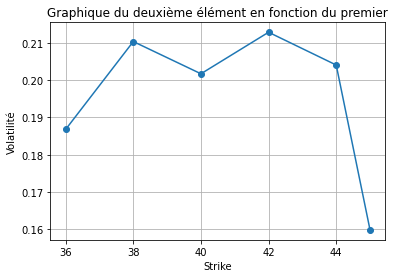

In [89]:
plt.plot(strike, y, marker='o', linestyle='-')

# Ajouter des labels et un titre
plt.xlabel('Strike')
plt.ylabel('Volatilité')
plt.title('Graphique du deuxième élément en fonction du premier')

# Afficher le graphique
plt.grid(True)
plt.show()

### Grapher le mse en fonction de la volatilité pour se rendre compte de la convexité

In [90]:
def mse1(v0):
    s=0
    for i in range(df.shape[0]):
        s += (call_heston_cf(df['Spot'].iloc[i], v0, 0.29176096, 2.38525033, 3.84200107, df['Interest_rate'].iloc[i], -0.26687578, df['Maturity'].iloc[i], df['Strike'].iloc[i], chfun_heston) - df['Mid'].iloc[i])**2
    return s/df.shape[0]

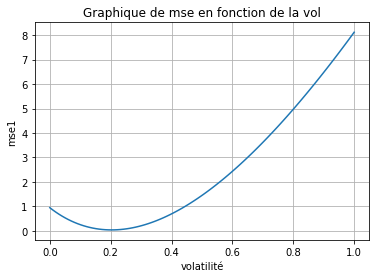

In [91]:
v0_values = np.linspace(0, 1, 100)  # Vous pouvez ajuster la plage selon vos besoins

# Calculer les valeurs de mse1(v0)
mse_values = [mse1(v0) for v0 in v0_values]

# Créer le graphique
plt.plot(v0_values, mse_values)
plt.xlabel('volatilité')
plt.ylabel('mse1')
plt.title('Graphique de mse en fonction de la vol')
plt.grid(True)
plt.show()

### Calibration en minimisant Pi1 et Pi2

In [19]:
def get_pi1(s0, v0, vbar, a, vvol, r, rho, t, k, chfun_heston):
    # Inner integral 1
    def int1(w, s0, v0, vbar, a, vvol, r, rho, t, k):
        return np.real(np.exp(-1j * w * np.log(k)) * chfun_heston(s0, v0, vbar, a, vvol, r, rho, t, w - 1j) /
                       (1j * w * chfun_heston(s0, v0, vbar, a, vvol, r, rho, t, -1j)))
    
    int1_result, _ = quad(lambda w: int1(w, s0, v0, vbar, a, vvol, r, rho, t, k), 0, 100)
    pi1 = int1_result / np.pi + 0.5
    return pi1

def get_pi2(s0, v0, vbar, a, vvol, r, rho, t, k, chfun_heston):
    # Inner integral 2
    def int2(w, s0, v0, vbar, a, vvol, r, rho, t, k):
        return np.real(np.exp(-1j * w * np.log(k)) * chfun_heston(s0, v0, vbar, a, vvol, r, rho, t, w) / (1j * w))
    
    int2_result, _ = quad(lambda w: int2(w, s0, v0, vbar, a, vvol, r, rho, t, k), 0, 100)
    pi2 = int2_result / np.pi + 0.5
    return pi2

In [20]:
p2 = 0
for i in range(df.shape[0]):
    p2 += get_pi2(df['Spot'].iloc[i], 0.5, 0.5, 1, 1, df['Interest_rate'].iloc[i], -0.5, df['Maturity'].iloc[i], df['Strike'].iloc[i], chfun_heston)
p2 = p2/df.shape[0]
print('pi2 = ', p2)

pi2 =  0.4367975040807644


rappel : on a obtenu pi1 = 0.87 et pi2 = 0.75

In [21]:
def cost2(params):
    v0, vbar, a, vvol, rho = params

    p1=0
    for i in range(df.shape[0]):
        p1 += get_pi1(df['Spot'].iloc[i], v0, vbar, a, vvol, df['Interest_rate'].iloc[i], rho, df['Maturity'].iloc[i], df['Strike'].iloc[i], chfun_heston)
    p1 = p1/df.shape[0]
    #print('pi1 = ', p1)

    p2=0
    for i in range(df.shape[0]):
        p2 += get_pi2(df['Spot'].iloc[i], v0, vbar, a, vvol, df['Interest_rate'].iloc[i], rho, df['Maturity'].iloc[i], df['Strike'].iloc[i], chfun_heston)
    p2 = p2/df.shape[0]
    #print('pi2 = ', p2)

    mean = (p1 + p2)/2
    mean_obs = (0.87+0.75)/2

    return abs(mean - mean_obs)

In [22]:
cost2([0.5, 0.5, 1, 1, -0.5])

0.28277119137226603

In [23]:
x0 = np.array([0.5, 0.5, 1, 1, -0.5]) 
lb = np.array([0, 0, 0, 0, -1])
ub = np.array([1, 1, 20, 5, 1])

result = minimize(cost2, x0, method='L-BFGS-B')
print(result)

C:\Users\Jason\AppData\Local\Temp\ipykernel_1804\14816526.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  int1_result, _ = quad(lambda w: int1(w, s0, v0, vbar, a, vvol, r, rho, t, k), 0, 100)
C:\Users\Jason\AppData\Local\Temp\ipykernel_1804\14816526.py:16: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  int2_result, _ = quad(lambda w: int2(w, s0, v0, vbar, a, vvol, r, rho, t, k), 0, 100)
C:\Users\Jason\AppData\Local\Temp\ipykernel_1804\14816526.py:16: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing 

      fun: nan
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.30092723, -0.04797126, -0.22459753,  4.60722889,  9.13003578])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 438
      nit: 7
     njev: 73
   status: 2
  success: False
        x: array([ 0.36310363,  0.32264635,  0.89035402,  1.40894115, -1.37344747])


In [24]:
x0 = np.array([0.5, 0.5, 1, 1, -0.5]) 
bounds = ((0, 1), (0, 1), (0,20), (0,5), (-1,1))

result = minimize(cost2, x0, bounds=bounds)

In [25]:
result

      fun: 0.05350121183302248
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.50910402e-06,  0.00000000e+00,  1.41809564e-02, -8.22419915e-03,
        1.39868864e+00])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 144
      nit: 16
     njev: 24
   status: 0
  success: True
        x: array([ 0.76918814,  0.09510544,  0.        ,  5.        , -1.        ])

In [26]:
cost2([ 0.76918814,  0.09510544,  0.        ,  5.        , -1.        ])

0.05350121183301626

In [27]:
cost2([ 0.36310363,  0.32264635,  0.89035402,  1.40894115, -1.37344747])

1.0674416905942508e-09

### GLOBAL OPTI

In [15]:
!pip install simanneal

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [16]:
from simanneal import Annealer

In [79]:
!pip install simulated_annealing

     ------------------------------------- 302.2/302.2 KB 19.5 MB/s eta 0:00:00
     --------------------------------------- 10.6/10.6 MB 28.4 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [13]:
import random
from simanneal import Annealer

# Définition de la classe CustomAnnealer
class CustomAnnealer(Annealer):
    def __init__(self, state):
        super(CustomAnnealer, self).__init__(state)

    def move(self):
        self.state += random.uniform(-1, 1)

    def energy(self):
        return f(self.state)

# Définition de la fonction f(x)
def f(x):
    return x**2 - 8*x + 17

# Configuration de l'algorithme de recuit simulé
x0 = 0  # Point de départ
annealer = CustomAnnealer(x0)
# Exécution de l'algorithme
state, energy = annealer.anneal()

# Affichage des résultats
print("Minimum trouvé pour x =", state)
print("Valeur minimale de f(x) =", energy)


 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000          7.53    82.20%    39.60%     0:00:00     0:00:00

Minimum trouvé pour x = 4.000003627496408
Valeur minimale de f(x) = 1.0000000000131593


In [17]:
from asamin import asamin

# Charger les données depuis le fichier data.txt
data = load('data.txt')

# Paramètres initiaux et bornes des paramètres
x0 = [0.5, 0.5, 1, -0.5, 5]
lb = [0, 0, 0, -1, 0]
ub = [1, 1, 6, 1, 20]

# Configuration des types de variables pour asamin
xtype = [-1, -1, -1, -1, -1]

# Optimisation avec asamin
asamin('set', 'test_in_cost_func', 0)
tic = time.time()
result = asamin('minimize', 'costf_2', x0, lb, ub, xtype)
toc = time.time() - tic

# Récupération des résultats de l'optimisation
x_opt = result[1]
f = result[0]

# Affichage de la solution
v0, Vbar, vvol, rho, a = x_opt
Heston_sol = [v0, Vbar, vvol, rho, (a + vvol**2) / (2 * Vbar)]
print("Heston Solution:", Heston_sol)
print("Optimized parameters:", x_opt)
print("Minimum cost:", f)

ModuleNotFoundError: No module named 'asamin'

In [18]:
from simanneal import Annealer
import numpy as np

# Définition de la classe CustomAnnealer
class CustomAnnealer(Annealer):
    def __init__(self, state, data):
        self.data = data
        super(CustomAnnealer, self).__init__(state)

    def move(self):
        self.state += np.random.uniform(-0.1, 0.1, size=self.state.shape)

    def energy(self):
        v0, vbar, a, eta, rho = self.state

        # Calcul de l'erreur quadratique moyenne
        mse = 0
        for i in range(self.data.shape[0]):
            mse += (call_heston_cf(self.data['Spot'].iloc[i], v0, vbar, a, eta, self.data['Interest_rate'].iloc[i], rho, self.data['Maturity'].iloc[i], self.data['Strike'].iloc[i], chfun_heston) - self.data['Mid'].iloc[i])**2
        mse /= self.data.shape[0]
        
        return mse

# Valeur initiale des paramètres
x0 = np.array([0.5, 0.5, 1, 1, -0.5])

# Création de l'objet Annealer avec la valeur initiale des paramètres et les données
annealer = CustomAnnealer(x0, df)

# Exécution de l'algorithme
state, energy = annealer.anneal()

# Affichage des résultats
print("Valeurs minimales des paramètres :", state)
print("Valeur minimale de l'erreur quadratique moyenne :", energy)


 Temperature        Energy    Accept   Improve     Elapsed   Remaining
C:\Users\Jason\AppData\Local\Temp\ipykernel_9316\4240476898.py:32: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  int2_result, _ = quad(lambda w: int2(w, s0, v0, vbar, a, vvol, r, rho, t, k), 0, 100)
C:\Users\Jason\AppData\Local\Temp\ipykernel_9316\4240476898.py:25: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  int1_result, _ = quad(lambda w: int1(w, s0, v0, vbar, a, vvol, r, rho, t, k), 0, 1

Valeurs minimales des paramètres : [ 0.16810219  0.39262668  1.22072913  2.81959902 -0.36643614]
Valeur minimale de l'erreur quadratique moyenne : 0.044069248824101785


In [25]:
def mse(params):
    v0, vbar, a, eta, rho = params
    mse = 0
    for i in range(df.shape[0]):
        mse += (call_heston_cf(df['Spot'].iloc[i], v0, vbar, a, eta, df['Interest_rate'].iloc[i], rho, df['Maturity'].iloc[i], df['Strike'].iloc[i], chfun_heston) - df['Mid'].iloc[i])**2
    mse /= df.shape[0]
        
    return mse

In [28]:
mse([ 0.16810219,  0.39262668,  1.22072913,  2.81959902, -0.36643614])

0.04406924738505104

In [29]:
mse([ 0.20281547,  0.29176096,  2.38525033,  3.84200107, -0.26687578])

0.038419795339863845

In [30]:
mse([ 0.01908501,  0.1977073,   4.58895302,  0.14271301, -7.11355577])

0.17379469019892083